##Module 5 -

### Solution notebook for module 5

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


##Query 5.1 

    For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )

In [0]:
#The usual imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = (20,8)
import seaborn as sns

import os

**We will import week2.csv to get the required data.**

In [0]:
import pandas as pd
data= pd.read_csv('week2.csv')

In [0]:
#we will calcuate the mean daily return using the formula given

annual_mean= (data['Day_Perc_Change'].mean() * 252)
annual_std= data['Day_Perc_Change'].std() * math.sqrt(252)

print('The value of mean annual return is {:.2f} and std annual return is {:.2f}'.format(annual_mean, annual_std))

The value of mean annual return is 11.86 and std annual return is 26.71


**Thus we have sucessfully calculated the mean annual returns and std annual returns, we can move on to next task.**



---


##Query 5.2 
    
    Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

**We will start off by importing all the stocks, we will include in our portfolio. We will have 5 stocks, and each of them will have a 20% weightage initially.**

In [0]:
data_idbi= pd.read_csv('drive/My Drive/IDBI.csv')
data_raymond= pd.read_csv('drive/My Drive/RAYMOND.csv')
data_voltas= pd.read_csv('drive/My Drive/VOLTAS.csv')
data_adani= pd.read_csv('drive/My Drive/ADANIPOWER.csv')

In [0]:
#create a new column to contain our closing prices
portfolio_data= pd.DataFrame(columns= [ 'Adani', 'Raymond', 'Voltas', 'idbi', 'Laxmimach'])

In [0]:
#assigning all the closing prices to corresponding columns of dataframe.

portfolio_data['Adani']= data_adani['Close Price']
portfolio_data['Raymond']= data_raymond['Close Price']
portfolio_data['Voltas']= data_voltas['Close Price']
portfolio_data['idbi']= data_idbi['Close Price']
portfolio_data['Laxmimach']= data['Close Price']

**Now we have a column with all closing prices, we can start building our portfolio from here.**

In [0]:
portfolio_data.head()

,Adani,Raymond,Voltas,idbi,Laxmimach
0,30.25,772.80,431.85,75.05,4614.05
1,32.85,785.00,432.45,76.65,4589.80
2,33.10,783.65,430.20,75.95,4637.25
3,31.90,746.95,414.10,69.95,4544.45
4,32.40,723.10,415.75,68.75,4522.70


**On plotting our data we can see that there are huge variations in the closing prices of our choosen stocks, which means our portfolio is quite diverse.**

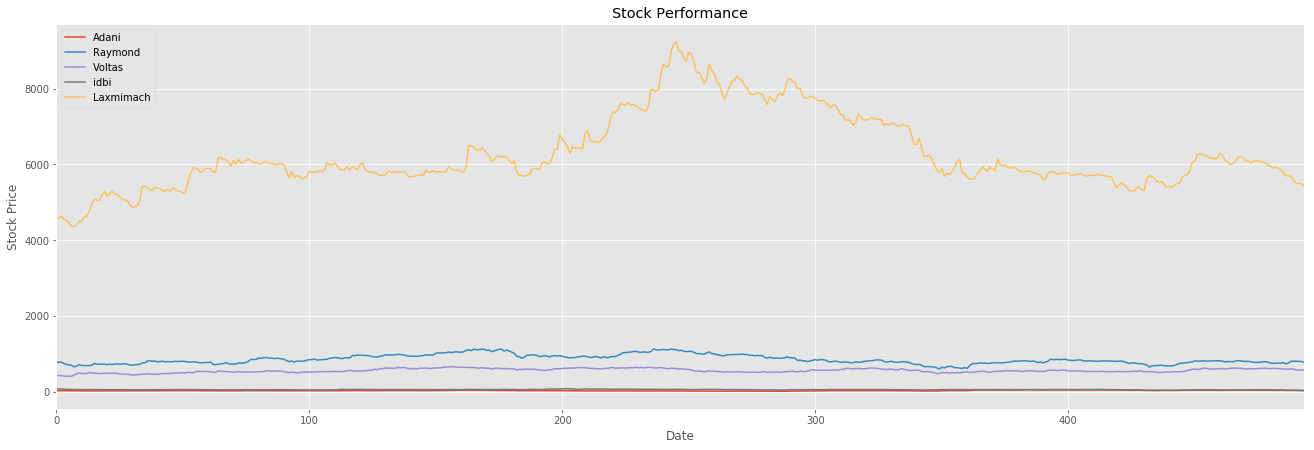

In [0]:
def plot_stocks(stocks,show='no'):
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = (20,8)
    stocks.plot()
    plt.title('Stock Performance')
    plt.ylabel('Stock Price')
    plt.xlabel('Date')
    plt.legend(loc='upper left')
    plt.tight_layout(pad=7)
    if show == 'yes':
        plt.show()
    plt.savefig('stock_performance.png')
    return
 
plot_stocks(portfolio_data)

**The next step would be to build our portfolio, the steps involved are :-**

 **1. Get normalized value for closing prices of all stocks.**
 
          -- Here i will be dividing all the prices with price on first row.
          
**2. Multiply these normalized prices with allocated weightage.**
 
**3. We will then start multiplying the resultant with initial funds or cash available.**

          -- This way we can get the daily stocks values.
         
**4. The last step is to add all the stocks values along first axis i.e. row, and thus we will get our Daily Portfolio Value.**

In [0]:
#initial allocations
allocations= [0.2, 0.2, 0.2, 0.2, 0.2]

#initital funds
cash= 10000


def Portfolio_Value(portfolio_data, allocs, start_val):
  
  """
  Args:
         portfolio_data : takes the df with all closing prices.
         
         allocs: A list of allocated resources
         
         atart_val : A number, giving value for initial funds.
  """
  
  total_shares = float(sum(allocs))
  weights = [w/total_shares for w in allocs]
    
  #step1
  normed = portfolio_data/portfolio_data.ix[0,:] 
    
  #step2
  alloced = normed*weights
    
  #step3
  pos_vals = alloced * start_val
    
  #step4
  series_portfolio_value = pos_vals.sum(axis=1)  
    
  return series_portfolio_value
 
portfolio= Portfolio_Value(portfolio_data, allocations, cash)

portfolio.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


0    10000.000000
1    10238.379936
2    10242.908172
3     9793.908736
4     9731.478120
dtype: float64

**portfolio dataframe now has out daily portfolio values. We can also plot it show daily portfolio value**

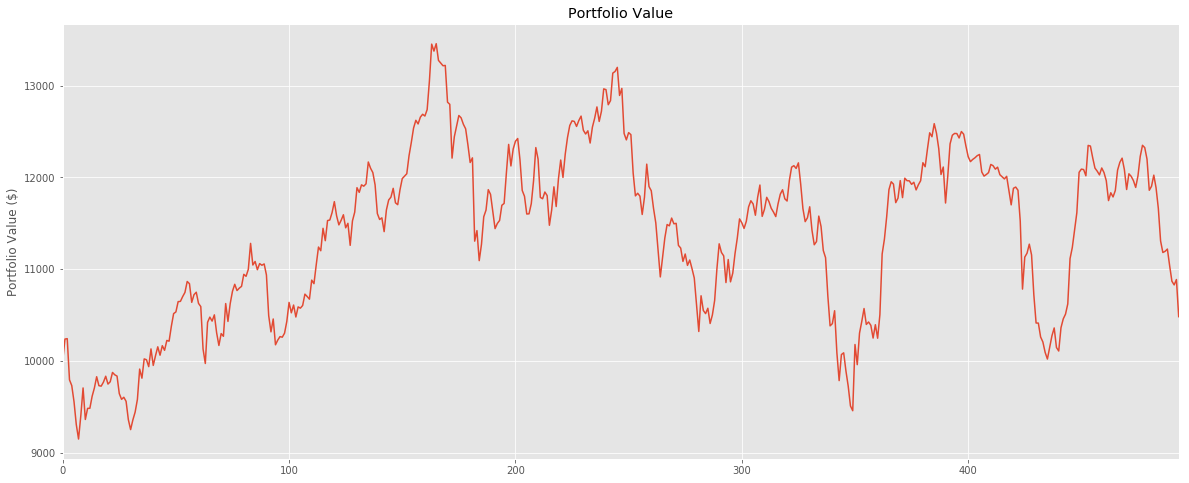

<Figure size 1440x576 with 0 Axes>

In [0]:
#helper function for plotting
def Plot_Portfolio_Value(port_val,show='no'):
    plt.style.use('ggplot')
    fig = plt.figure()
    plt.rcParams['figure.figsize'] = (20,8)
    ax = fig.add_subplot(111)
    ax.set_title('Portfolio Value')
    ax.set_ylabel('Portfolio Value ($)')
    port_val.plot()
    if show == 'yes':
        plt.show()
    plt.savefig('Portfolio_Value.png')
 
#driver program
Plot_Portfolio_Value(portfolio, show='yes')

**The next step would be to calculate the annual return and volitality of entire portfolio.**

In [0]:
# Expected return
ret_annual = np.sum((portfolio_data.mean() * allocations * 252))
    
# Expected volatility using covarience
vol_annual = np.sqrt(np.dot(allocations, np.dot(portfolio_data.cov()*252, allocations)))
 
print("THE annual return for portfolio is {:.2f}, and the volitality is {:.2f}".format(ret_annual, vol_annual))

THE annual return for portfolio is 392951.17, and the volitality is 3378.91


**Thus we have sucessfully calculated the both the things, we would normalize our portfolio before moving further for better calculations of our sharpe ratio.**

In [0]:
get_normed = portfolio_data/portfolio_data.ix[0,:] 
get_normed.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Adani,Raymond,Voltas,idbi,Laxmimach
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.085950,1.015787,1.001389,1.021319,0.994744
2,1.094215,1.014040,0.996179,1.011992,1.005028
3,1.054545,0.966550,0.958898,0.932045,0.984916
4,1.071074,0.935688,0.962719,0.916056,0.980202




---


##Query 5.3 

    Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

**We will be creating 6000 different portfolio, each with different combinations weightage provided to each of the stock in our portfolio.**

In [0]:
np.random.seed(42)

#the number of portfolios
num_ports = 6000

#to store all weights
all_weights = np.zeros((num_ports, len(portfolio_data.columns)))

#to store annual returns
ret_arr = np.zeros(num_ports)

#to store volitality
vol_arr = np.zeros(num_ports)

#to store sharpe ratios for all portfolios. This will be used in next task.
sharpe_arr = np.zeros(num_ports)


for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (get_normed.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(get_normed.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

**Below given is the code to generate the scatterplot with each point representing a portfolio.**

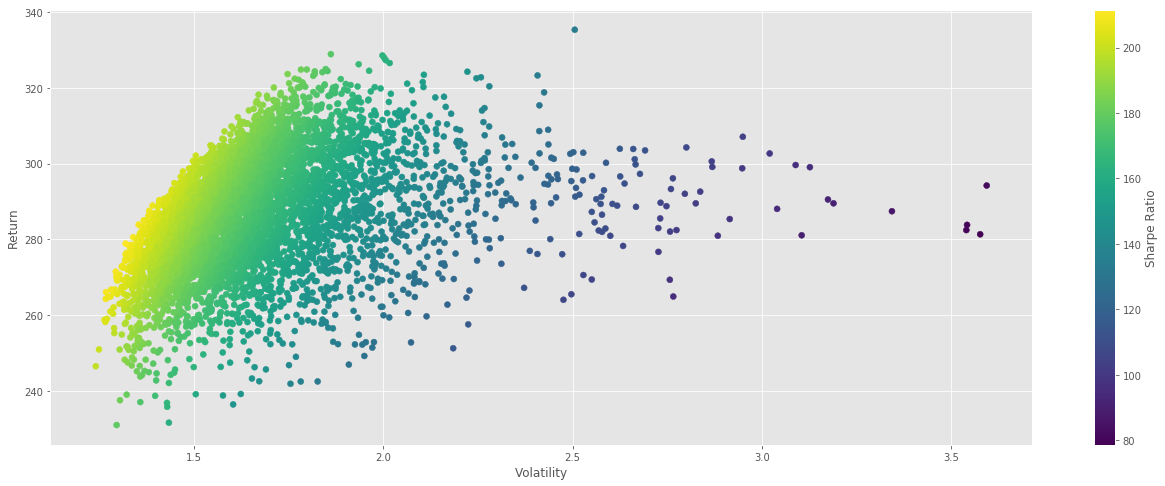

In [0]:
plt.rcParams['figure.figsize'] = (22,8)
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

**Thus we have sucessfully plotted all the portfolio in a Return vs Volitality curve.**



---


##Query 5.4 
    
    Mark the 2 portfolios where -
    -- Portfolio 1 - The Sharpe ratio is the highest
    -- Portfolio 2 - The volatility is the lowest. 

**Our first task is to get the portfolio with highest sharpe ratio, to do this we would just find the point in portfolio scatterplot, with highest value of sharpe ratio.**

In [0]:
#portfolio with highest sharpe ratio
#return for portfolio
max_sr_vol= vol_arr[sharpe_arr.argmax()]
#volitality for portfolio
max_sr_ret= ret_arr[sharpe_arr.argmax()]

**We also need to find a portfolio with minimum volitality.**

In [0]:
#portfolio with lowest volitality
#volitality for portfolio
min_vol_vol= vol_arr[vol_arr.argmin()]
#return for portfolio
min_vol_ret= ret_arr[vol_arr.argmin()]

**We will use the same plot we drew in 5.3, and highlight these two points using star markers.**

**1. RED STAR : Highest Sharpe Ratio**

**2. BLUE STAR : Lowest Volitality**

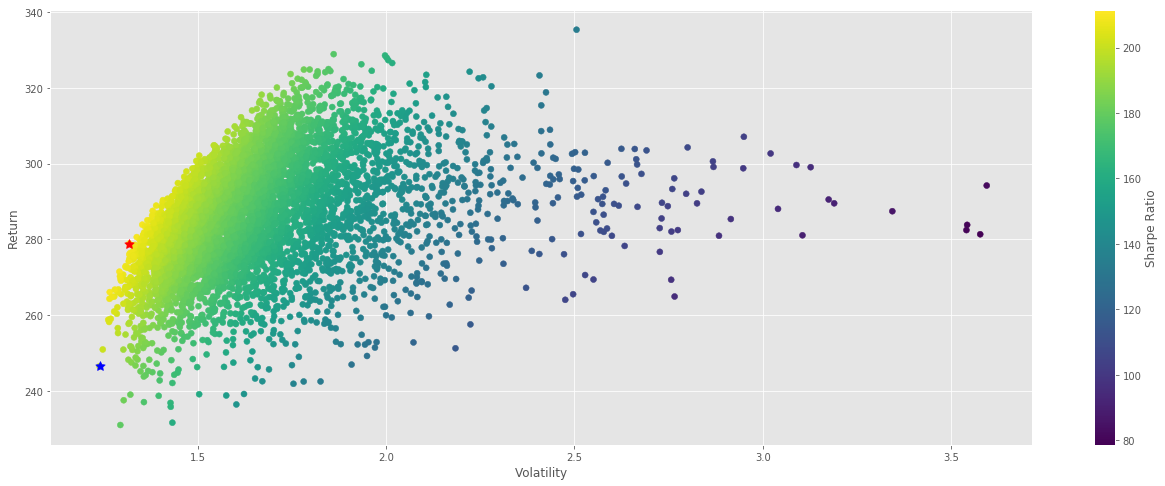

In [0]:
plt.rcParams['figure.figsize'] = (22,8)
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret, c= 'red', s=100, marker=(5, 1))
plt.scatter(min_vol_vol, min_vol_ret, c='blue', s= 100, marker= (5, 1))
plt.show()